# Import needed packages

In [17]:
import numpy as np
from scipy.sparse.linalg import expm_multiply
import matplotlib.pyplot as plt


plt.style.use('seaborn-talk')
plt.rcParams.update({'figure.dpi': 120,'figure.figsize': (6,4)})     

from pyQME.spectral_density import SpectralDensity
from pyQME.linear_spectra import SecularSpectraCalculator
from pyQME.tensors.markov import RedfieldTensor
from pyQME.utils import overdamped_brownian,underdamped_brownian,get_timeaxis,get_rot_str_mat_no_intr_mag

# Define the system

**Hamiltonian (1/cm)**

In [18]:
nchrom = 2 #num. of chromophores

H = np.zeros([nchrom,nchrom])

H[0] = np.asarray([16332.23926633      ,79.215346     ])
H[1] = np.asarray([79.215346,16472.9029614])

#from CP29, a602 and a603

In [19]:
H

array([[16332.23926633,    79.215346  ],
       [   79.215346  , 16472.9029614 ]])

**Transition dipoles (Debye)**

In [20]:
dipoles = np.array([[ 3.05904569, -4.95633516, -3.62632634],[-1.31984249,  6.12749522, -2.0840956 ]]) #from CP29, a602 and a603

**Center of each chromophore**

In [21]:
#angstrom
cent = np.array([[ 62.26981289,  48.46544649,  38.23015247],[ 56.39832859,  56.98439055,  45.79249759]])

#convert to cm
cent_cm = cent*1e-8

**Temperature (Kelvin)**

In [22]:
temp = 298

**Spectral density**

In [23]:
freq_axis_SD = np.arange(0.1,4000,0.1)

In [24]:
SD_data = overdamped_brownian(freq_axis_SD,30,37)
SD_data = SD_data + underdamped_brownian(freq_axis_SD,5,50,518)

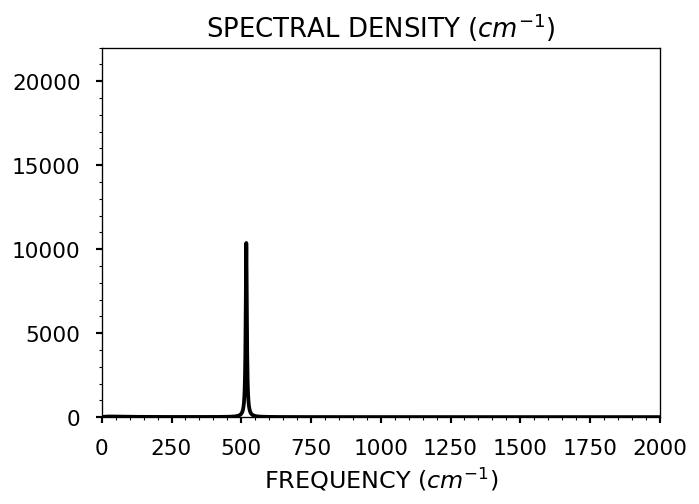

In [25]:
plt.plot(freq_axis_SD,SD_data,color='black');
plt.xlim(0,2000);
plt.ylim(0,22000)
plt.title('SPECTRAL DENSITY ($cm^{-1}$)');
plt.xlabel('FREQUENCY ($cm^{-1}$)');
plt.minorticks_on()

In [26]:
SD_obj = SpectralDensity(freq_axis_SD,SD_data,temperature=temp)

**Time axis (cm)**

In [27]:
energies = np.diag(H)
time_axis = get_timeaxis(SD_obj.Reorg,energies,5)
SD_obj.time = time_axis

**Relaxation Tensor (Complex Redfield)**

In [28]:
rel_tens_obj = RedfieldTensor(H,SD_obj)

# Spectrum calculation

In [29]:
spectrum_obj = SecularSpectraCalculator(rel_tens_obj,approximation='cR')

In [34]:
r_ij = get_rot_str_mat_no_intr_mag(cent_cm,dipoles,H)
freq_axis_CD,CD = spectrum_obj.calc_CD_OD(r_ij)   #to be saved

In [35]:
r_ij

array([[0.        , 0.00030755],
       [0.00030755, 0.        ]])

# Check the results

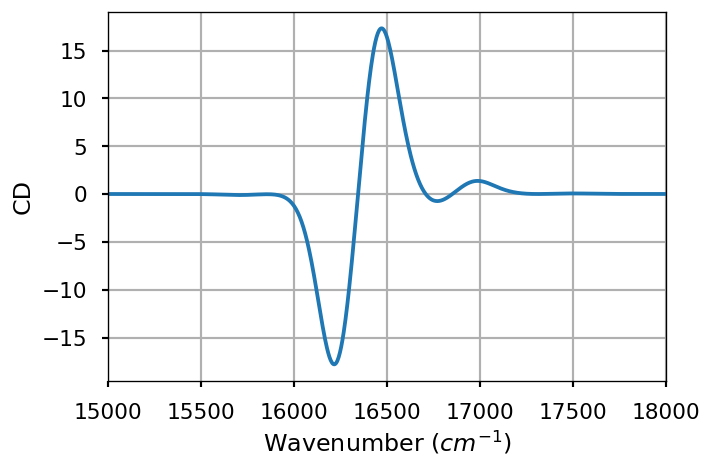

In [36]:
plt.plot(freq_axis_CD,CD)
plt.xlim(15000,18000)
plt.xlabel('Wavenumber ($cm^{-1}$)');
plt.ylabel('CD')
plt.grid()